<a href="https://colab.research.google.com/github/taocao/fsdl-text-recognizer-2021-labs/blob/main/deep_learning_fundamentals_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.6.9


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1          
tensorboard-plugin-wit        1.8.0          
tensorflow                    2.4.1          
tensorflow-datasets           4.0.1          
tensorflow-estimator          2.4.0          
tensorflow-gcs-config         2.4.0          
tensorflow-hub                0.11.0         
tensorflow-metadata           0.27.0         
tensorflow-probability        0.12.1         


In [ ]:
!pip list | grep torch

torch                         1.7.0+cu101    
torchsummary                  1.5.1          
torchtext                     0.3.1          
torchvision                   0.8.1+cu101    


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

Tue Feb 16 20:19:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |    945MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Basic numerical computing

In [ ]:
import numpy as np

# Initialize a numpy ndarray with 3 rows, 2 columns
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [ ]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [ ]:
# We can set values of a whole column
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [ ]:
X = np.array([
  [1, 2],
  [3, 4],
  [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
x = np.array([10, 20])
print(x)
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x

[10 20]
(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [ ]:
X.shape, x.shape

((3, 2), (2,))

In [ ]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [ ]:
# Matrix multiplication
# http://matrixmultiplication.xyz/

x = np.array([[10, 20],]).T
result = X @ x  # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

### Indexing

In [ ]:
X = np.random.rand(3, 2)
X

array([[0.68477873, 0.39544369],
       [0.81256687, 0.45685131],
       [0.72517132, 0.95011242]])

In [ ]:
X > 0.5

array([[ True, False],
       [ True, False],
       [ True,  True]])

In [ ]:
X[X > 0.5] = 1
X

array([[1.        , 0.39544369],
       [1.        , 0.45685131],
       [1.        , 1.        ]])

## Basic plotting

In [ ]:
import matplotlib.pyplot as plt
plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

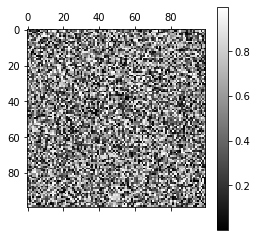

In [ ]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

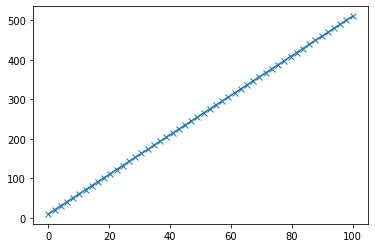

In [ ]:
x = np.linspace(0, 100)
y = x * 5 + 10
# y = x * w + b

plt.plot(x, y, 'x-')

## Basic regression with a linear model

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


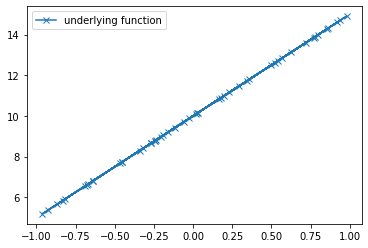

In [ ]:
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.legend()

### Basic prediction function: Linear

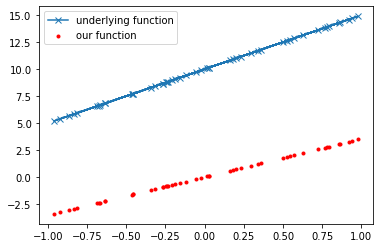

In [ ]:
# Let's initialize our predictions

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # The initialization is important to properly deal with different
    # input sizes (otherwise gradients quickly go to 0).
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_pred, color='r', marker='.', label='our function')
plt.legend()

### Basic loss function: MSE


In [ ]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 100.93370627884154


### Add back propagation

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

106.42554447336684
69.36140987365532


### Train using gradient descent!

Epoch 0, loss 102.78156070718389
Epoch 5, loss 11.88029775062523
Epoch 10, loss 1.7148417899180246
Epoch 15, loss 0.4120555051034701
Epoch 20, loss 0.16246527961238283
Epoch 25, loss 0.07875727950696039
Epoch 30, loss 0.04025422676302256
Epoch 35, loss 0.020812989052793843


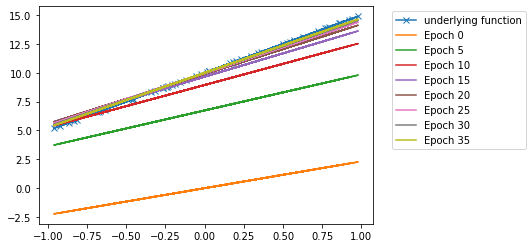

In [ ]:
plt.plot(x, y_true, marker='x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


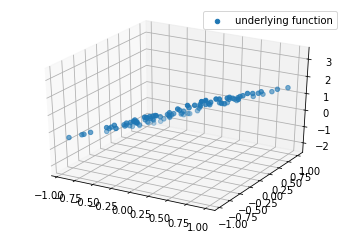

In [ ]:
# What about 2-dimensional x?

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

2.665846722269744


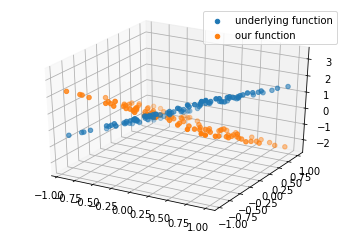

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 2.665846722269744
Epoch 1, loss 2.2488208876385145
Epoch 2, loss 1.9145642080628673
Epoch 3, loss 1.6416461913877343
Epoch 4, loss 1.415321341675687
Epoch 5, loss 1.225244683352166
Epoch 6, loss 1.0639971048271957
Epoch 7, loss 0.9261295384512183
Epoch 8, loss 0.8075400578495601
Epoch 9, loss 0.7050650372316011
Epoch 10, loss 0.6162083330554418
Epoch 11, loss 0.5389597909067592
Epoch 12, loss 0.47167184795010797
Epoch 13, loss 0.4129741658305979
Epoch 14, loss 0.3617133696539084
Epoch 15, loss 0.31690954005747074
Epoch 16, loss 0.27772403556724423
Epoch 17, loss 0.2434351038110276
Epoch 18, loss 0.2134189508891717
Epoch 19, loss 0.18713471973823123


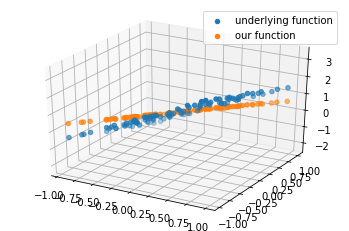

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


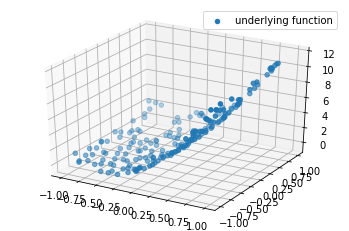

In [ ]:
# Make non-linear data

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 18.296219464248846
Epoch 1, loss 14.301825680655774
Epoch 2, loss 11.53208650564618
Epoch 3, loss 9.572954773379141
Epoch 4, loss 8.156394028207053
Epoch 5, loss 7.108035622065541
Epoch 6, loss 6.3137159440031745
Epoch 7, loss 5.6980682140768115
Epoch 8, loss 5.21081291832923
Epoch 9, loss 4.817966760270646
Epoch 10, loss 4.49619550558703
Epoch 11, loss 4.229177728393039
Epoch 12, loss 4.005255933183524
Epoch 13, loss 3.8159128563461677
Epoch 14, loss 3.6547775576629413
Epoch 15, loss 3.5169724024743063
Epoch 16, loss 3.3986800345305066
Epoch 17, loss 3.2968528738776297
Epoch 18, loss 3.209015429193282
Epoch 19, loss 3.133127459834493
Epoch 20, loss 3.0674873777592766
Epoch 21, loss 3.010662552568192
Epoch 22, loss 2.961437847997272
Epoch 23, loss 2.9187767160787192
Epoch 24, loss 2.8817911065395907
Epoch 25, loss 2.849717697437379
Epoch 26, loss 2.8218987636048554
Epoch 27, loss 2.7977665288339533
Epoch 28, loss 2.776830196053288
Epoch 29, loss 2.7586650811769107
Epoch 3

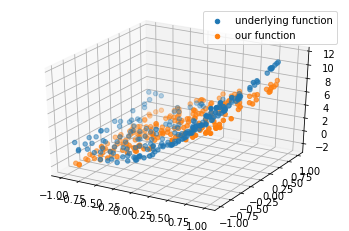

In [ ]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

19.48362675634573


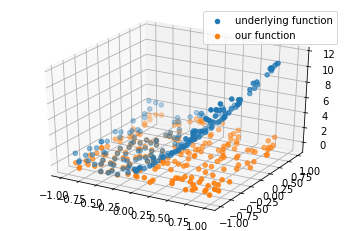

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

22.260749985512458
11.42923534727267


Epoch 0, loss 11.42923534727267
Epoch 1, loss 7.982558778909004
Epoch 2, loss 6.1775665714378825
Epoch 3, loss 4.924715937199023
Epoch 4, loss 3.8481604246638197
Epoch 5, loss 2.935406523013225
Epoch 6, loss 2.266575175420749
Epoch 7, loss 1.780133001673252
Epoch 8, loss 1.4603179544575888
Epoch 9, loss 1.2396377991669096
Epoch 10, loss 1.082799454262829
Epoch 11, loss 0.9586767021152075
Epoch 12, loss 0.8578395260094364
Epoch 13, loss 0.7734608653398
Epoch 14, loss 0.6997946817918219
Epoch 15, loss 0.6362580289825793
Epoch 16, loss 0.579678274062822
Epoch 17, loss 0.5317515066857879
Epoch 18, loss 0.4916430105864737
Epoch 19, loss 0.4573718934665837
Epoch 20, loss 0.42790630690008363
Epoch 21, loss 0.40242072527775574
Epoch 22, loss 0.3811416956459563
Epoch 23, loss 0.3629094198311358
Epoch 24, loss 0.3468680755534981
Epoch 25, loss 0.332732830145509
Epoch 26, loss 0.32015490570575833
Epoch 27, loss 0.3087259330013835
Epoch 28, loss 0.2986540879891208
Epoch 29, loss 0.2894691187557215

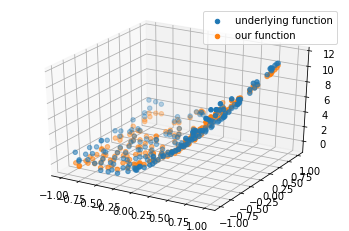

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.9897, grad_fn=<MseLossBackward>)


In [ ]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(18.9897, grad_fn=<MseLossBackward>)
tensor(15.1523, grad_fn=<MseLossBackward>)


tensor(15.1523, grad_fn=<MseLossBackward>)
tensor(13.1440, grad_fn=<MseLossBackward>)
tensor(11.6288, grad_fn=<MseLossBackward>)
tensor(10.2193, grad_fn=<MseLossBackward>)
tensor(8.6909, grad_fn=<MseLossBackward>)
tensor(7.0291, grad_fn=<MseLossBackward>)
tensor(5.3680, grad_fn=<MseLossBackward>)
tensor(3.8974, grad_fn=<MseLossBackward>)
tensor(2.7773, grad_fn=<MseLossBackward>)
tensor(2.0216, grad_fn=<MseLossBackward>)
tensor(1.5450, grad_fn=<MseLossBackward>)
tensor(1.2412, grad_fn=<MseLossBackward>)
tensor(1.0440, grad_fn=<MseLossBackward>)
tensor(0.9048, grad_fn=<MseLossBackward>)
tensor(0.8014, grad_fn=<MseLossBackward>)
tensor(0.7186, grad_fn=<MseLossBackward>)
tensor(0.6489, grad_fn=<MseLossBackward>)
tensor(0.5885, grad_fn=<MseLossBackward>)
tensor(0.5370, grad_fn=<MseLossBackward>)
tensor(0.4931, grad_fn=<MseLossBackward>)
tensor(0.4554, grad_fn=<MseLossBackward>)
tensor(0.4227, grad_fn=<MseLossBackward>)
tensor(0.3947, grad_fn=<MseLossBackward>)
tensor(0.3700, grad_fn=<MseLos

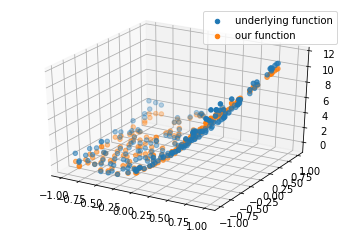

In [ ]:
# Now we run the training loop

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

### Same thing, in Tensorflow/Keras

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 11.6874
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9327
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5258
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2807
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2406
Ep

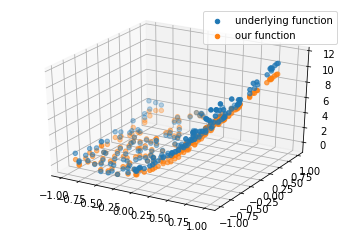

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

inputs = keras.Input(shape=(2,))
l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))